In [1]:
import os
from glob import glob

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

task = "ptx"
probe = "Clarius"

from ARGUS_ptx_ar_inference import ARGUS_ptx_ar_inference
from ARGUS_ptx_roi_inference import ARGUS_ptx_roi_inference

In [2]:
nnet_ar = ARGUS_ptx_ar_inference(config_file_name="../ARGUS/ARGUS_"+task+"_ar.cfg", network_name="vfold", device_num=0, source=probe)
nnet_roi = ARGUS_ptx_roi_inference(config_file_name="../ARGUS/ARGUS_"+task+"_roi.cfg", network_name="vfold", device_num=0)

Adjusting priors for Clarius


In [3]:
nnet_ar_best_models = [8, 3, 6]
nnet_roi_best_models = [4, 3, 1]

for r in range(nnet_ar.num_models):
    model_name = os.path.join("Results", task+"_vfold_run"+str(r), "best_model_"+str(nnet_ar_best_models[r])+".pth")
    nnet_ar.load_model(r, model_name)

for r in range(nnet_roi.num_models):
    model_name = os.path.join("Results", task+"_roi_run"+str(r), "best_model_"+str(nnet_roi_best_models[r])+".pth")
    nnet_roi.load_model(r, model_name)

In [4]:
vid_names = glob("Data/*.mp4")
vid = ARGUS_load_video(vid_names[0])

In [5]:
print(vid.shape)

(97, 2160, 3840)


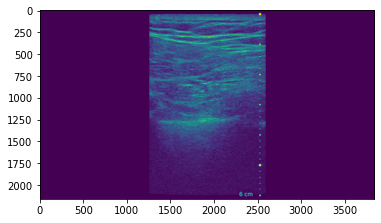

In [6]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

plt.imshow(vid[10])

In [7]:
nnet_ar.preprocess(vid)

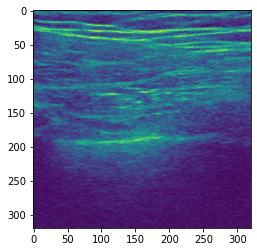

In [8]:
plt.imshow(nnet_ar.preprocessed_ptx_video[0])

(12, 320, 320)
12


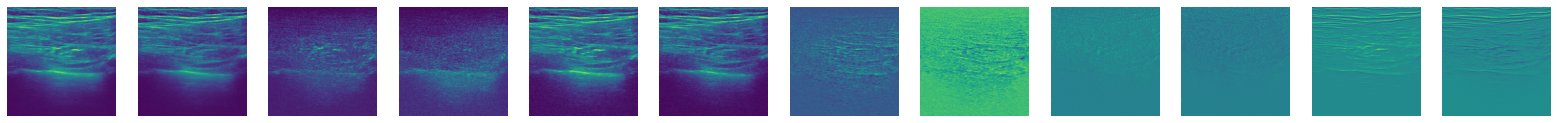

In [9]:

arr = nnet_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [10]:
labels = nnet_ar.inference()

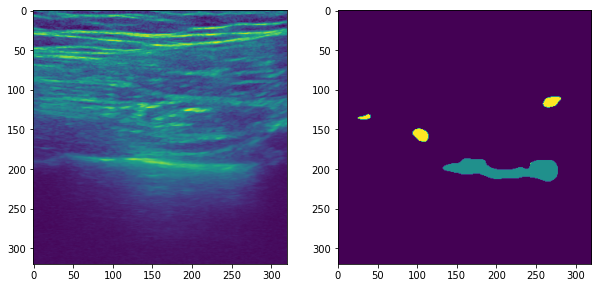

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(rotate(arr[0],270))
plt.subplot(1,2,2)
plt.imshow(rotate(labels,270))


In [12]:
nnet_roi.generate_roi(nnet_ar.input_image, nnet_ar.input_array, nnet_ar.label_array)

In [13]:
nnet_roi.inference()

(0, array([1., 0.]))